In [ ]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.join(os.getenv("DT4CO_PATH"), "src"))
from dt4co.dataModel import PatientData

In [2]:
# COHORT = ["W03", "W10", "W11", "W16", "W18", "W20", "W29", "W31", "W35", "W36", "W39", "W43", "W50", "W53"]
COHORT = ["W03", "W11",  "W16", "W29", "W35", "W36", "W43", "W53"] # "W18" "W31"
NSUBS = len(COHORT)
BASE_PDIR = "/work2/08352/gtpash/frontera/data/IvyGAP"
PINFO = [ PatientData(os.path.join(BASE_PDIR, pat, "patient_info.json"), os.path.join(BASE_PDIR, pat)) for pat in COHORT ]

In [22]:
xs = np.array([])
ys = np.array([])
xlast = np.array([])
ylast = np.array([])
xall = np.array([])
yall = np.array([])

xchemo = np.array([])
ychemo = np.array([])
xradio = np.array([])
yradio = np.array([])

for i, patient in enumerate(PINFO):
    xs = np.append(xs, patient.visit_days[:-1])
    ys = np.append(ys, i*np.ones_like(patient.visit_days[:-1]))
    xlast = np.append(xlast, patient.visit_days[-1])
    ylast = np.append(ylast, i)

    xall = np.append(xall, patient.visit_days)
    yall = np.append(yall, i*np.ones_like(patient.visit_days))

    cdays = patient.chemo_days
    cdays = cdays[cdays < xlast[-1]]
    
    xchemo = np.append(xchemo, cdays)
    ychemo = np.append(ychemo, i*np.ones_like(cdays))

    xradio = np.append(xradio, patient.radio_days)
    yradio = np.append(yradio, i*np.ones_like(patient.radio_days))

In [23]:
def constant_offset_dots(dots, offset):
    offsets = dots.get_offsets()
    jittered_offsets = offsets
    # only jitter in the y-direction
    jittered_offsets[:, 1] += offset*np.ones_like(offsets.shape[0])
    dots.set_offsets(jittered_offsets)

In [24]:
fontsize=14

plt.rc("figure", dpi=400)                   # High-quality figure ("dots-per-inch")
# plt.rc("text", usetex=True)                 # Crisp axis ticks
plt.rc("font", family="sans-serif")         # Crisp axis labels
plt.rc("legend", edgecolor='none')          # No boxes around legends
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams.update({'font.size': fontsize})
plt.rcParams["figure.autolayout"] = True
# rcParams['figure.constrained_layout.use'] = True

plt.rcParams['grid.color'] = (0.5, 0.5, 0.5, 0.2)

charcoal    = [0.1, 0.1, 0.1]
utblue = '#00A9B7'
utorange = '#bf5700'

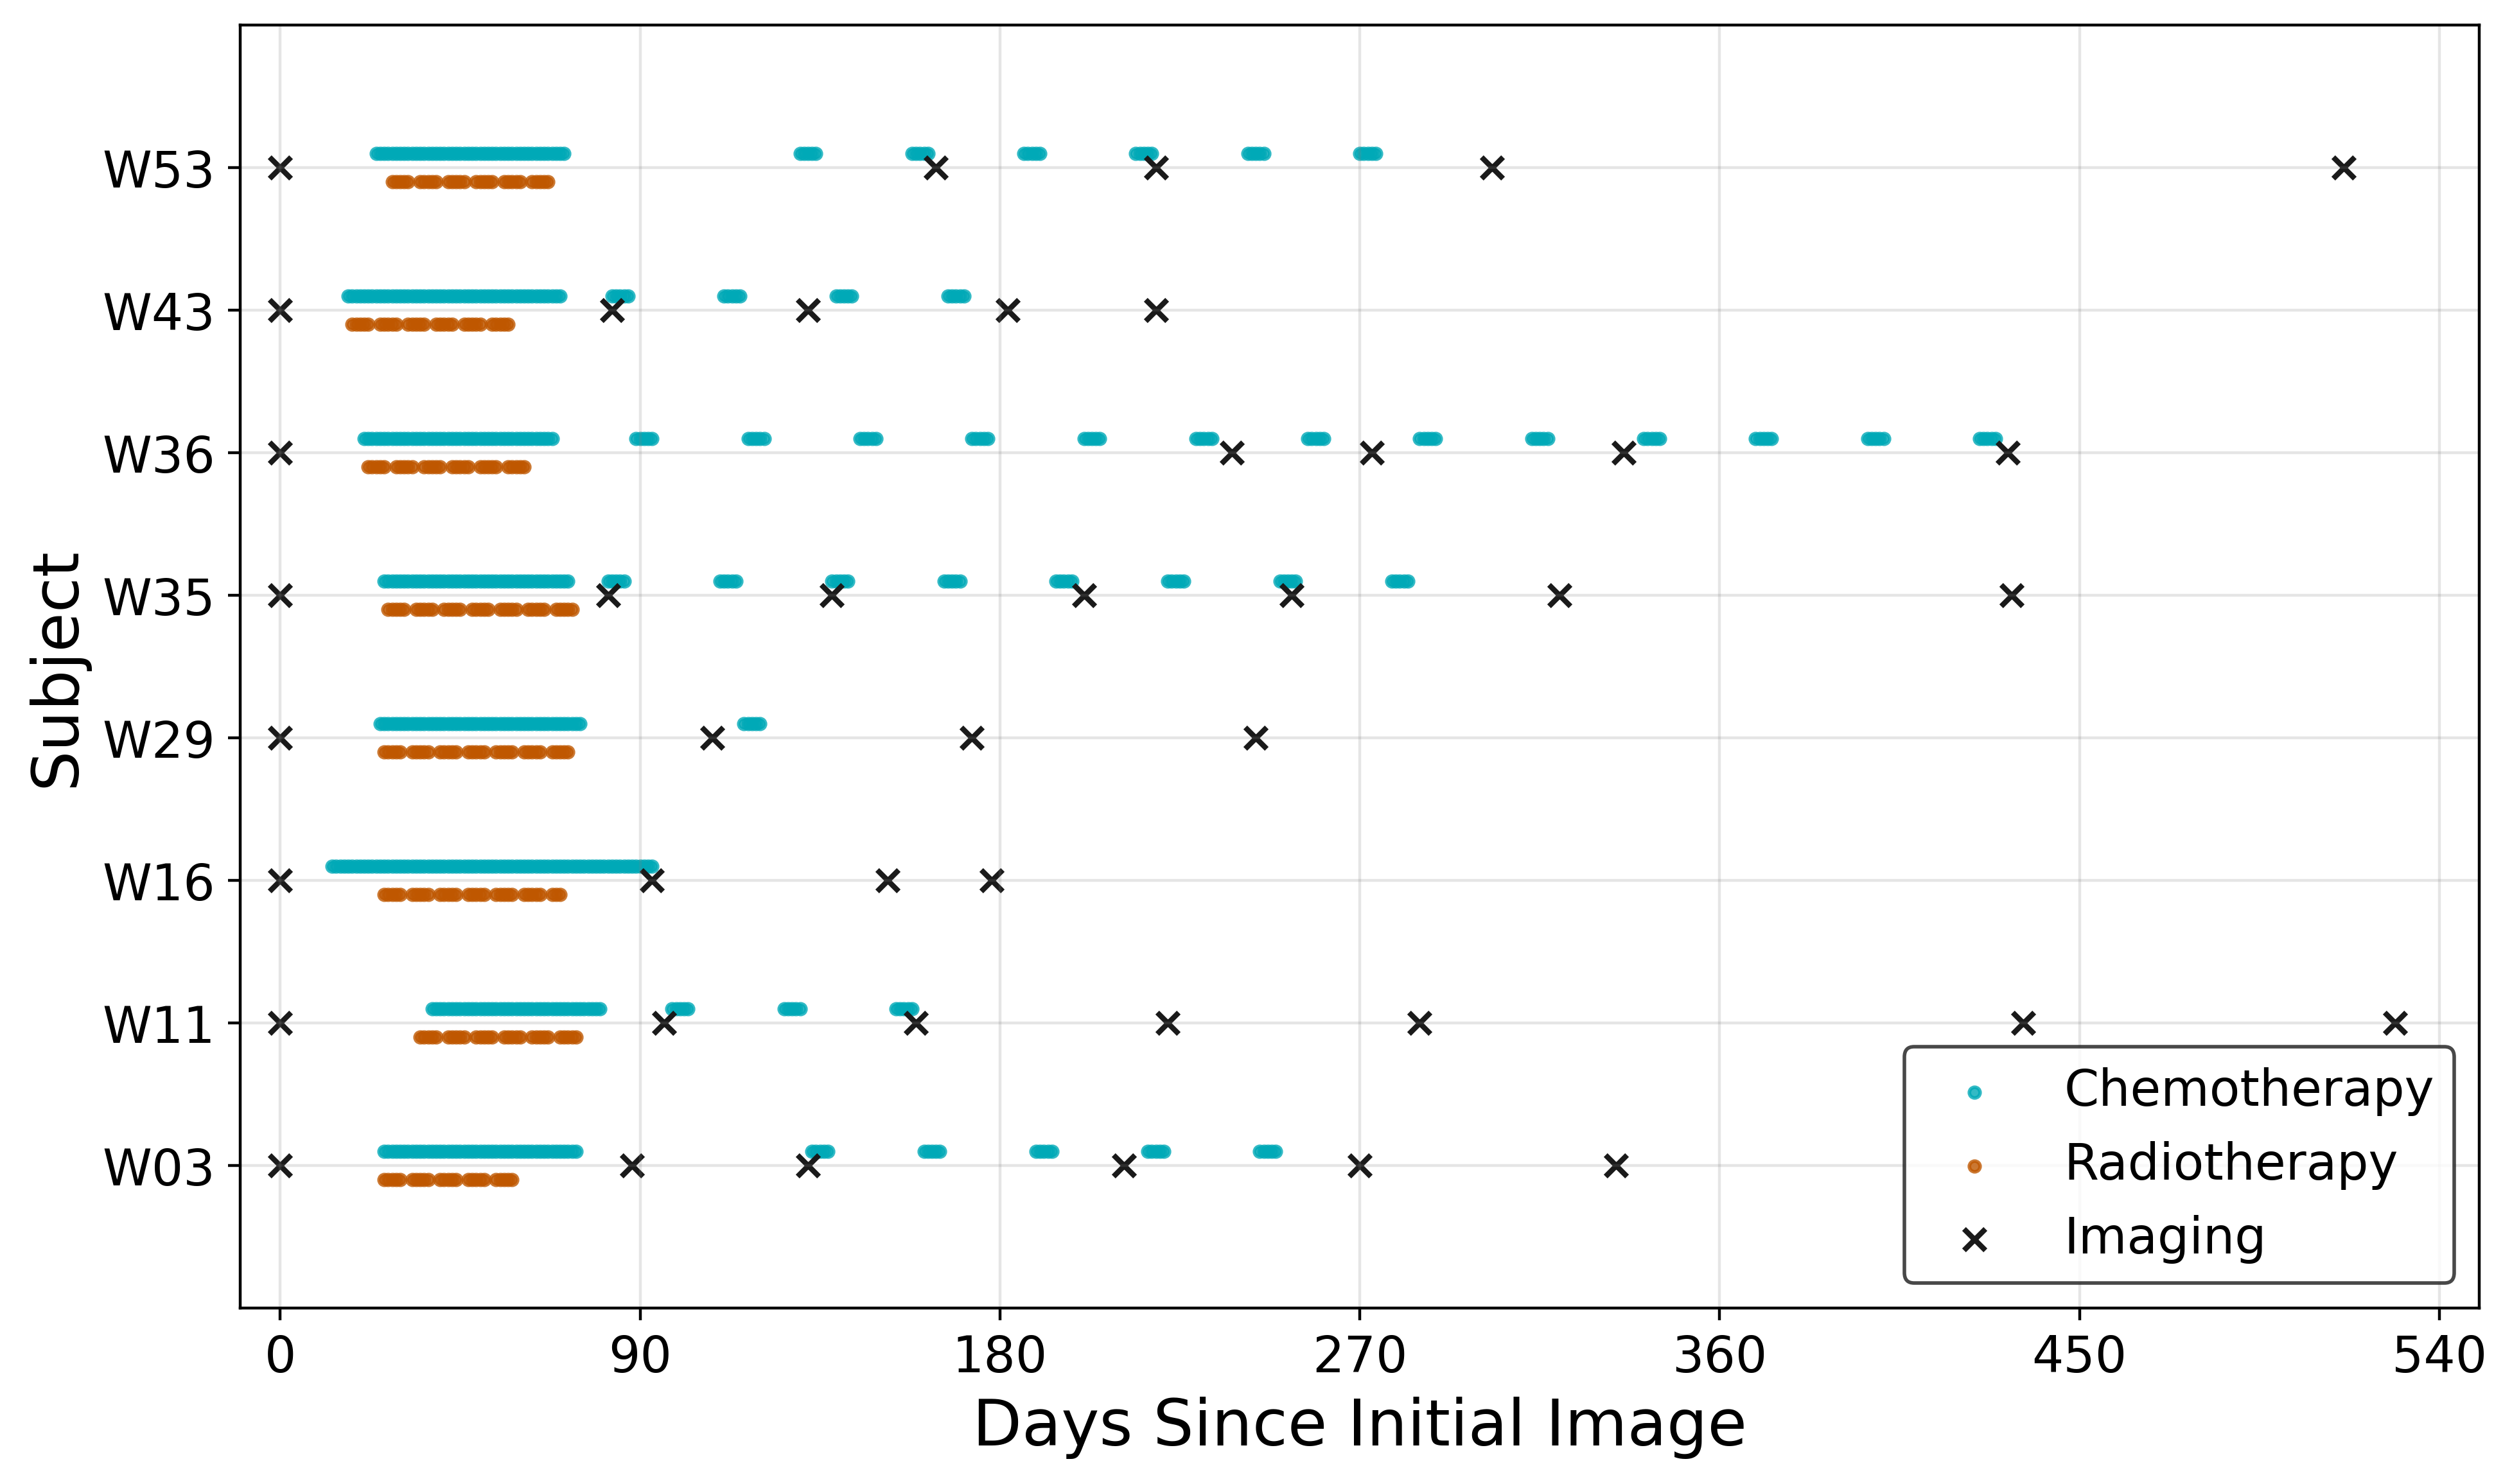

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

chemodots = ax.scatter(xchemo, ychemo, color=utblue, marker='.', alpha=0.8, label='Chemotherapy')
constant_offset_dots(chemodots, 0.1)

radiodots = ax.scatter(xradio, yradio, color=utorange, marker='.', alpha=0.8, label='Radiotherapy')
constant_offset_dots(radiodots, -0.1)

# ax.scatter(xs, ys, color=charcoal, marker='x', label='Imaging')
# ax.scatter(xlast, ylast, color=charcoal, marker='o', label='Prediction')
ax.scatter(xall, yall, color=charcoal, marker='x', label='Imaging')

plt.xticks(np.arange(0, 540+1, 90))
plt.xlabel('Days Since Initial Image', fontsize=18)
plt.xlim([-10, 550])

plt.yticks(np.arange(NSUBS), COHORT)
plt.ylim(-1, NSUBS)
plt.ylabel('Subject', fontsize=18)

plt.grid()
plt.legend(frameon=True, edgecolor=charcoal)
plt.savefig('ivygap_timelines.pdf', bbox_inches='tight')
plt.show()